# Estimating Quantities at given heights

Importing Modules

In [1]:
from intake import open_catalog
import xarray as xr

from eurec4a_environment.decomposition import levels

Data 

In [2]:
# Defining catalog
cat = open_catalog("https://raw.githubusercontent.com/leifdenby/eurec4a-intake/master/catalog.yml")

# Getting dataset for JOANNE Level-3
ds = cat.dropsondes.to_dask()

# Specifying the level_name

The most basic input that the function needs is the dataset containing the profile(s), the variable to be estimated and the level at which this is to be done. 

In the example below, we estimate the wind speeds at the mixed layer top. 


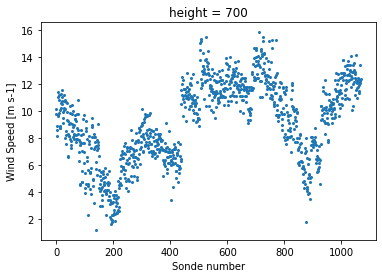

In [3]:
ds_ml = levels.height_specified_quantity(
                    ds,
                    variable='wspd',
                    level_name="mixed_layer",
                    cell_type='point'
                    )

# Plotting the data
ds_ml.plot(marker='o',markersize=2,linewidth=0)

Note that in the above example, we use `cell_type = 'point'`. This is because we want the value only at the specified level, and not in a bin containing the specified level. However, since most users will not be looking at an exact level and would possibly be using bins, the default `cell_type` is `bin`. 

This requires that the user must mention the bounds for the bin (e.g. 50m). No default bounds are provided. Bounds can be provided either with the keyword `bounds` which would set the lower and upper bounds to the `bounds` value provided, or the keywords `lower` and `upper` can be used to set separate lower and upper bounds to the bin. For example, in cases where the user wants values only above the specified level, the `lower` argument can be set to 0.


To-do for the notebook:

1. Estimating FTH is an application of this function
2. Differences between layers
3. Show user how they can change definition of specified level
4. Allow user to select custom-made definition

# Getting values at a custom level

User can define their own custom level, either by providing a function (still in progress) to estimate the level or by directly stating the coordinates of the level (in m).

In the example below, we want to get an idea of temperature at ~300 m. We set the bounds to 25 m, and take a mean within those levels.

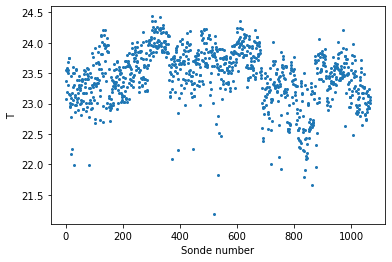

In [4]:
ds_custom = levels.height_specified_quantity(
                    ds,
                    variable='T',
                    level_name='custom',
                    level_value=300,
                    bounds=25,
                    cell_method='mean'
                    )

# Plotting the data
ds_custom.plot(marker='o',markersize=2,linewidth=0)